# Pivoted full data

En este documento se crean las tablas para las predicciones.

In [1]:
import pandas as pd

PATH = "data/cephalosporines_clean/"

In [2]:
df = pd.read_parquet(PATH + "pivoted_full_data_imputed.parquet")
df.head()

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,"Pregnancy, puerperium and perinatal conditions",Product issues,Psychiatric disorders,Renal and urinary disorders,Reproductive system and breast disorders,"Respiratory, thoracic and mediastinal disorders",Skin and subcutaneous tissue disorders,Social circumstances,Surgical and medical procedures,Vascular disorders
REPORT_ID,,,,,,,,,,,,,,,,,,,,,
164,68.0,47.000000,173.00,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
173,42.0,82.000000,180.00,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,29.0,77.652228,165.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,59.0,62.400000,159.70,1,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
356,21.0,60.000000,164.52,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
soc_cols = [
    "Blood and lymphatic system disorders",
    "Cardiac disorders",
    "Congenital, familial and genetic disorders",
    "Ear and labyrinth disorders",
    "Endocrine disorders",
    "Eye disorders",
    "Gastrointestinal disorders",
    "General disorders and administration site conditions",
    "Hepatobiliary disorders",
    "Immune system disorders",
    "Infections and infestations",
    "Injury, poisoning and procedural complications",
    "Investigations",
    "Metabolism and nutrition disorders",
    "Musculoskeletal and connective tissue disorders",
    "Neoplasms benign, malignant and unspecified (incl cysts and polyps)",
    "Nervous system disorders",
    "Pregnancy, puerperium and perinatal conditions",
    "Product issues",
    "Psychiatric disorders",
    "Renal and urinary disorders",
    "Reproductive system and breast disorders",
    "Respiratory, thoracic and mediastinal disorders",
    "Skin and subcutaneous tissue disorders",
    "Social circumstances",
    "Surgical and medical procedures",
    "Vascular disorders",
]


In [4]:
# Assuming df is already a pandas DataFrame
df_bin = df.copy()

# Binarize the SOC columns: set to 1 if > 0, else 0
for c in soc_cols:
    df_bin[c] = (df_bin[c] > 0).astype('int8')

all_cols = df_bin.columns

feature_cols = [
    c for c in all_cols
    if c not in soc_cols and c != "REPORT_ID"
]

# df_bin is already in pandas format
X = df_bin[feature_cols]
Y = df_bin[soc_cols]

# Free memory
df = None
df_bin = None

# uint32 vs int8 memory usage
# uint32 uses 4 bytes per value, int8 uses 1 byte per value
# so converting float to uint32 is better than leaving as float. int8 goes from -128 to 127, uint32 goes from 0 to 4,294,967,295 (for example, if the number is 300, in int8 it would overflow, but in uint32 it would be fine and they both use less memory than float)
print(X.info(memory_usage='deep'))

# make all of them, except AGE_Y, WEIGHT_KG, HEIGHT_CM int8
int8_cols = [c for c in X.columns if c not in ['AGE_Y', 'WEIGHT_KG', 'HEIGHT_CM']]
X[int8_cols] = X[int8_cols].astype('int8')
print(X.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 17854 entries, 164 to 908149644
Columns: 9093 entries, AGE_Y to 
dtypes: float64(3), int32(2), uint32(9088)
memory usage: 619.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 17854 entries, 164 to 908149644
Columns: 9093 entries, AGE_Y to 
dtypes: float64(3), int8(9090)
memory usage: 155.3 MB
None


In [5]:
Y.head()

,Blood and lymphatic system disorders,Cardiac disorders,"Congenital, familial and genetic disorders",Ear and labyrinth disorders,Endocrine disorders,Eye disorders,Gastrointestinal disorders,General disorders and administration site conditions,Hepatobiliary disorders,Immune system disorders,...,"Pregnancy, puerperium and perinatal conditions",Product issues,Psychiatric disorders,Renal and urinary disorders,Reproductive system and breast disorders,"Respiratory, thoracic and mediastinal disorders",Skin and subcutaneous tissue disorders,Social circumstances,Surgical and medical procedures,Vascular disorders
REPORT_ID,,,,,,,,,,,,,,,,,,,,,
164,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
356,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X.head()

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,
REPORT_ID,,,,,,,,,,,,,,,,,,,,,
164,68.0,47.000000,173.00,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
173,42.0,82.000000,180.00,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,29.0,77.652228,165.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,59.0,62.400000,159.70,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,21.0,60.000000,164.52,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model

In [16]:
# Core
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    f1_score,
    precision_recall_fscore_support
)

from catboost import CatBoostClassifier, Pool

import matplotlib.pyplot as plt
import seaborn as sns
from scripts import style
style.mpl_apply()

import joblib


In [ ]:
feature_names = X.columns.tolist()
soc_names = Y.columns.tolist()
K = len(soc_names)

print(f"Number of features: {len(feature_names)}, Number of SOCs: {K}")

Number of features: 9093, Number of SOCs: 27


In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42
)


In [13]:
def train_catboost_binary(
    X_train, y_train,
    X_valid, y_valid,
    feature_names,
    random_seed=42
):
    train_pool = Pool(
        data=X_train,
        label=y_train,
        feature_names=feature_names
    )
    valid_pool = Pool(
        data=X_valid,
        label=y_valid,
        feature_names=feature_names
    )

    model = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        # imbalance handling
        auto_class_weights="Balanced",
        # tree/boosting params (tune later)
        depth=6,
        learning_rate=0.05,
        iterations=100,
        l2_leaf_reg=3.0,
        random_seed=random_seed,
        # GPU
        task_type="GPU",
        devices="0",
        # overfitting control
        od_type="Iter",
        od_wait=100,
        use_best_model=True,
        verbose=100
    )

    model.fit(
        train_pool,
        eval_set=valid_pool
    )

    return model


In [14]:
models = {}
metrics = []

for k, soc in enumerate(soc_names):
    print(f"\n=== Training model for SOC: {soc} ({k+1}/{K}) ===")

    y_train_k = Y_train[soc]
    y_valid_k = Y_valid[soc]

    model_k = train_catboost_binary(
        X_train, y_train_k,
        X_valid, y_valid_k,
        feature_names
    )

    models[soc] = model_k

    # Predict probabilities on validation
    p_valid_k = model_k.predict_proba(X_valid)[:, 1]

    # Metrics
    # AUC and AP might fail if only 0s/1s present; guard it
    if y_valid_k.nunique() == 2:
        auc_k = roc_auc_score(y_valid_k, p_valid_k)
        ap_k = average_precision_score(y_valid_k, p_valid_k)
    else:
        auc_k = np.nan
        ap_k = np.nan

    # F1 at default 0.5 threshold
    yhat_valid_k = (p_valid_k >= 0.5).astype(int)
    f1_k = f1_score(y_valid_k, yhat_valid_k, zero_division=0)

    prevalence = y_valid_k.mean()

    metrics.append({
        "SOC": soc,
        "prevalence_valid": prevalence,
        "AUC": auc_k,
        "AP": ap_k,
        "F1_thr_0.5": f1_k
    })

metrics_df = pd.DataFrame(metrics).sort_values("prevalence_valid", ascending=False)
print(metrics_df.head(20))



=== Training model for SOC: Blood and lymphatic system disorders (1/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6506079	best: 0.6506079 (0)	total: 146ms	remaining: 14.5s
99:	test: 0.8025960	best: 0.8025960 (99)	total: 1.09s	remaining: 0us
bestTest = 0.8025960326
bestIteration = 99

=== Training model for SOC: Cardiac disorders (2/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6266387	best: 0.6266387 (0)	total: 14.5ms	remaining: 1.44s
99:	test: 0.7529260	best: 0.7529260 (99)	total: 1.01s	remaining: 0us
bestTest = 0.7529259622
bestIteration = 99

=== Training model for SOC: Congenital, familial and genetic disorders (3/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8913912	best: 0.8913912 (0)	total: 13.4ms	remaining: 1.32s
99:	test: 0.9406000	best: 0.9518957 (3)	total: 990ms	remaining: 0us
bestTest = 0.9518956542
bestIteration = 3
Shrink model to first 4 iterations.

=== Training model for SOC: Ear and labyrinth disorders (4/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6955615	best: 0.6955615 (0)	total: 20.7ms	remaining: 2.05s
99:	test: 0.7691863	best: 0.7703379 (90)	total: 1.02s	remaining: 0us
bestTest = 0.7703379095
bestIteration = 90
Shrink model to first 91 iterations.

=== Training model for SOC: Endocrine disorders (5/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7657569	best: 0.7657569 (0)	total: 15.1ms	remaining: 1.5s
99:	test: 0.7946556	best: 0.8712552 (3)	total: 1.14s	remaining: 0us
bestTest = 0.8712552488
bestIteration = 3
Shrink model to first 4 iterations.

=== Training model for SOC: Eye disorders (6/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6180042	best: 0.6180042 (0)	total: 12.2ms	remaining: 1.21s
99:	test: 0.7016338	best: 0.7034587 (88)	total: 933ms	remaining: 0us
bestTest = 0.7034586668
bestIteration = 88
Shrink model to first 89 iterations.

=== Training model for SOC: Gastrointestinal disorders (7/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5965205	best: 0.5965205 (0)	total: 26.6ms	remaining: 2.63s
99:	test: 0.7037196	best: 0.7037196 (99)	total: 1.27s	remaining: 0us
bestTest = 0.7037196457
bestIteration = 99

=== Training model for SOC: General disorders and administration site conditions (8/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6129141	best: 0.6129141 (0)	total: 25.4ms	remaining: 2.51s
99:	test: 0.6900853	best: 0.6900853 (99)	total: 1.33s	remaining: 0us
bestTest = 0.6900853217
bestIteration = 99

=== Training model for SOC: Hepatobiliary disorders (9/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6275541	best: 0.6275541 (0)	total: 19.4ms	remaining: 1.92s
99:	test: 0.7240555	best: 0.7442715 (39)	total: 1.22s	remaining: 0us
bestTest = 0.7442715168
bestIteration = 39
Shrink model to first 40 iterations.

=== Training model for SOC: Immune system disorders (10/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6447202	best: 0.6447202 (0)	total: 19.1ms	remaining: 1.89s
99:	test: 0.7638302	best: 0.7650200 (88)	total: 1.17s	remaining: 0us
bestTest = 0.7650199533
bestIteration = 88
Shrink model to first 89 iterations.

=== Training model for SOC: Infections and infestations (11/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7053617	best: 0.7053617 (0)	total: 28.5ms	remaining: 2.82s
99:	test: 0.8277947	best: 0.8277947 (99)	total: 1.2s	remaining: 0us
bestTest = 0.8277947009
bestIteration = 99

=== Training model for SOC: Injury, poisoning and procedural complications (12/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6951552	best: 0.6951552 (0)	total: 20.3ms	remaining: 2.01s
99:	test: 0.8466256	best: 0.8466256 (99)	total: 1.25s	remaining: 0us
bestTest = 0.8466256261
bestIteration = 99

=== Training model for SOC: Investigations (13/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6655456	best: 0.6655456 (0)	total: 20ms	remaining: 1.98s
99:	test: 0.7904132	best: 0.7904132 (99)	total: 1.35s	remaining: 0us
bestTest = 0.7904131711
bestIteration = 99

=== Training model for SOC: Metabolism and nutrition disorders (14/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6738073	best: 0.6738073 (0)	total: 20ms	remaining: 1.98s
99:	test: 0.7738212	best: 0.7745632 (98)	total: 1.11s	remaining: 0us
bestTest = 0.7745631933
bestIteration = 98
Shrink model to first 99 iterations.

=== Training model for SOC: Musculoskeletal and connective tissue disorders (15/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6984270	best: 0.6984270 (0)	total: 20.2ms	remaining: 2s
99:	test: 0.8038526	best: 0.8048368 (98)	total: 1.08s	remaining: 0us
bestTest = 0.80483675
bestIteration = 98
Shrink model to first 99 iterations.

=== Training model for SOC: Neoplasms benign, malignant and unspecified (incl cysts and polyps) (16/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7930446	best: 0.7930446 (0)	total: 20.1ms	remaining: 1.99s
99:	test: 0.8650099	best: 0.8659244 (95)	total: 1.16s	remaining: 0us
bestTest = 0.8659244478
bestIteration = 95
Shrink model to first 96 iterations.

=== Training model for SOC: Nervous system disorders (17/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5617694	best: 0.5617694 (0)	total: 22.6ms	remaining: 2.23s
99:	test: 0.6873340	best: 0.6873340 (99)	total: 1.26s	remaining: 0us
bestTest = 0.6873339713
bestIteration = 99

=== Training model for SOC: Pregnancy, puerperium and perinatal conditions (18/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9205435	best: 0.9205435 (0)	total: 13.8ms	remaining: 1.36s
99:	test: 0.9691496	best: 0.9692903 (98)	total: 1.2s	remaining: 0us
bestTest = 0.9692903459
bestIteration = 98
Shrink model to first 99 iterations.

=== Training model for SOC: Product issues (19/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6428789	best: 0.6428789 (0)	total: 18.9ms	remaining: 1.87s
99:	test: 0.6291643	best: 0.6927979 (4)	total: 1.17s	remaining: 0us
bestTest = 0.6927978992
bestIteration = 4
Shrink model to first 5 iterations.

=== Training model for SOC: Psychiatric disorders (20/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6546186	best: 0.6546186 (0)	total: 22.5ms	remaining: 2.23s
99:	test: 0.7173090	best: 0.7179106 (80)	total: 1.41s	remaining: 0us
bestTest = 0.7179105878
bestIteration = 80
Shrink model to first 81 iterations.

=== Training model for SOC: Renal and urinary disorders (21/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819954	best: 0.6819954 (0)	total: 22.9ms	remaining: 2.27s
99:	test: 0.7428115	best: 0.7431992 (89)	total: 1.06s	remaining: 0us
bestTest = 0.7431991994
bestIteration = 89
Shrink model to first 90 iterations.

=== Training model for SOC: Reproductive system and breast disorders (22/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5948793	best: 0.5948793 (0)	total: 25.8ms	remaining: 2.55s
99:	test: 0.6970181	best: 0.7189293 (71)	total: 1.1s	remaining: 0us
bestTest = 0.7189292908
bestIteration = 71
Shrink model to first 72 iterations.

=== Training model for SOC: Respiratory, thoracic and mediastinal disorders (23/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6364441	best: 0.6364441 (0)	total: 16.4ms	remaining: 1.63s
99:	test: 0.7562995	best: 0.7566885 (91)	total: 1.07s	remaining: 0us
bestTest = 0.7566885054
bestIteration = 91
Shrink model to first 92 iterations.

=== Training model for SOC: Skin and subcutaneous tissue disorders (24/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6797248	best: 0.6797248 (0)	total: 20.6ms	remaining: 2.04s
99:	test: 0.7799532	best: 0.7799532 (99)	total: 1.13s	remaining: 0us
bestTest = 0.7799531519
bestIteration = 99

=== Training model for SOC: Social circumstances (25/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7147065	best: 0.7147065 (0)	total: 24.3ms	remaining: 2.4s
99:	test: 0.7349517	best: 0.7714766 (14)	total: 1.14s	remaining: 0us
bestTest = 0.7714766264
bestIteration = 14
Shrink model to first 15 iterations.

=== Training model for SOC: Surgical and medical procedures (26/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7082762	best: 0.7082762 (0)	total: 11.9ms	remaining: 1.18s
99:	test: 0.8235047	best: 0.8306172 (56)	total: 978ms	remaining: 0us
bestTest = 0.8306172192
bestIteration = 56
Shrink model to first 57 iterations.

=== Training model for SOC: Vascular disorders (27/27) ===


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5838750	best: 0.5838750 (0)	total: 18.3ms	remaining: 1.81s
99:	test: 0.7137929	best: 0.7152915 (77)	total: 1.15s	remaining: 0us
bestTest = 0.7152914703
bestIteration = 77
Shrink model to first 78 iterations.
                                                  SOC  prevalence_valid  \
23             Skin and subcutaneous tissue disorders          0.432372   
7   General disorders and administration site cond...          0.324839   
6                          Gastrointestinal disorders          0.215346   
10                        Infections and infestations          0.204144   
12                                     Investigations          0.175301   
22    Respiratory, thoracic and mediastinal disorders          0.156539   
16                           Nervous system disorders          0.154299   
14    Musculoskeletal and connective tissue disorders          0.105573   
0                Blood and lymphatic system disorders          0.102772   
26                             

# Metrics

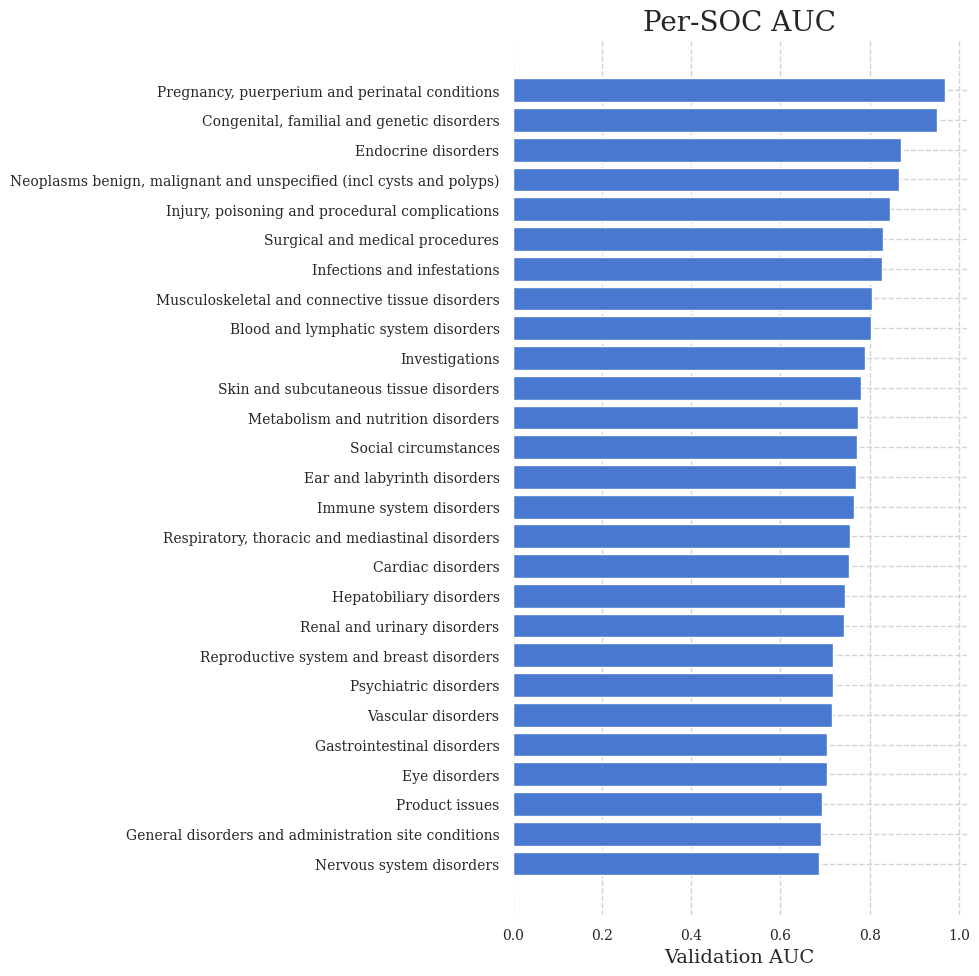

In [28]:
metric = "AUC"

plt.figure(figsize=(10, 10))
order = metrics_df.sort_values(metric, ascending=False)["SOC"]

plt.barh(
    y=range(len(order)),
    width=metrics_df.set_index("SOC").loc[order, metric]
)
plt.yticks(range(len(order)), order)
plt.xlabel(f"Validation {metric}")
plt.title(f"Per-SOC {metric}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


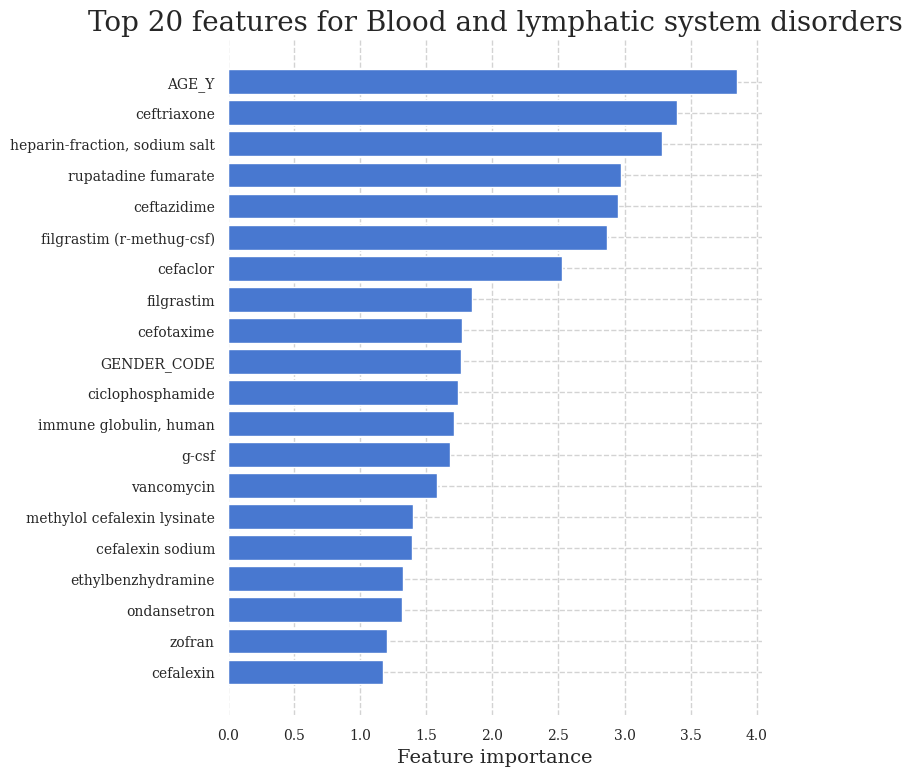

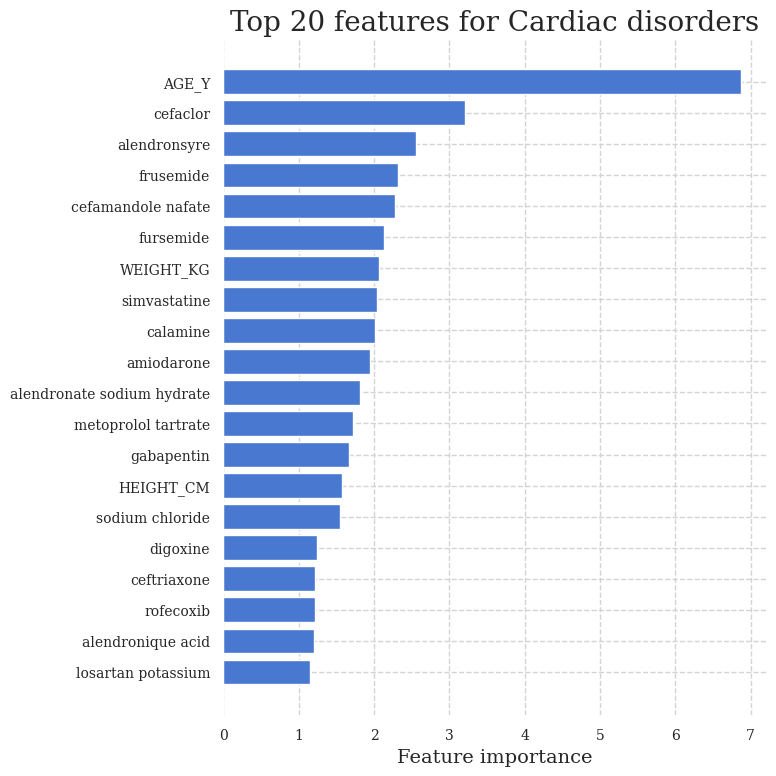

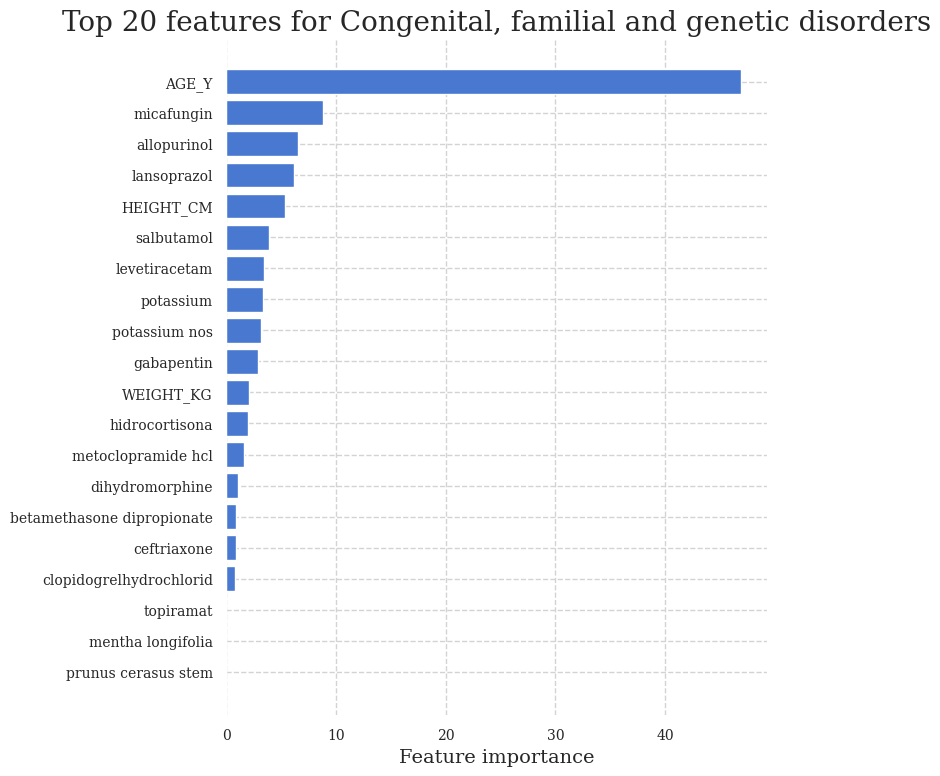

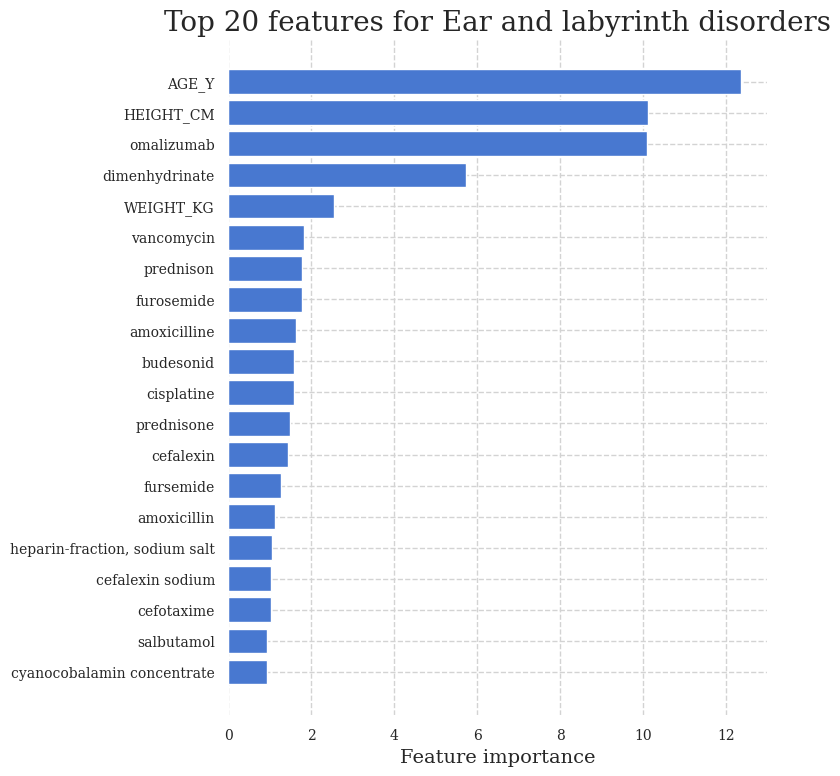

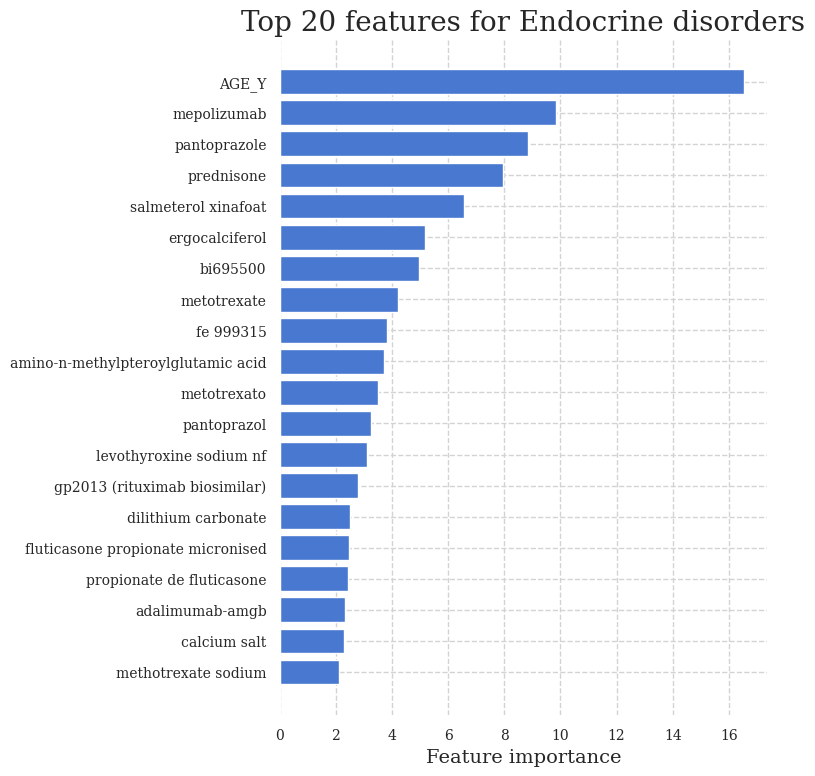

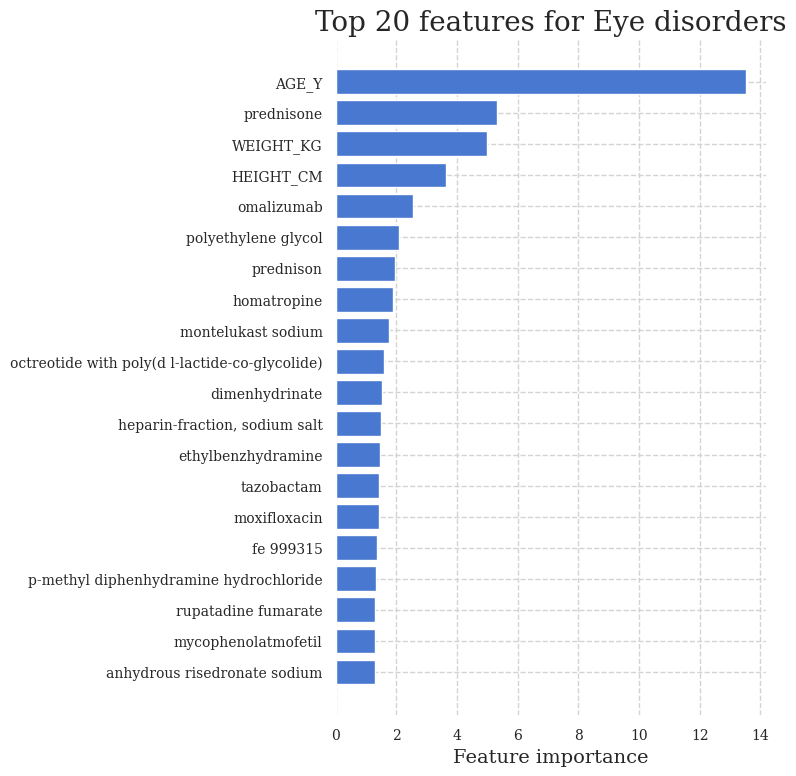

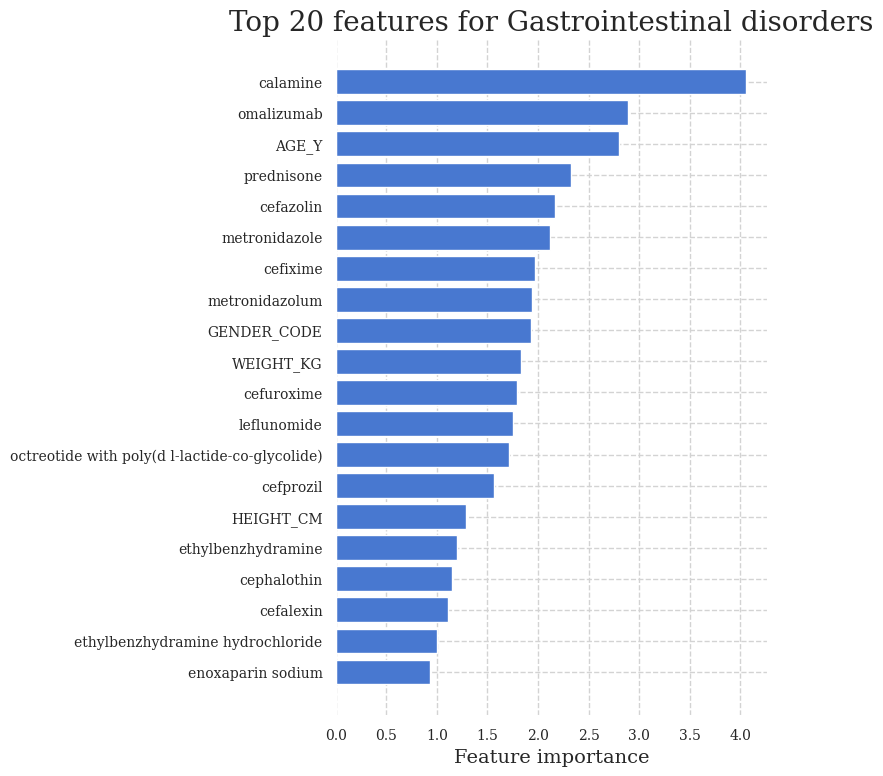

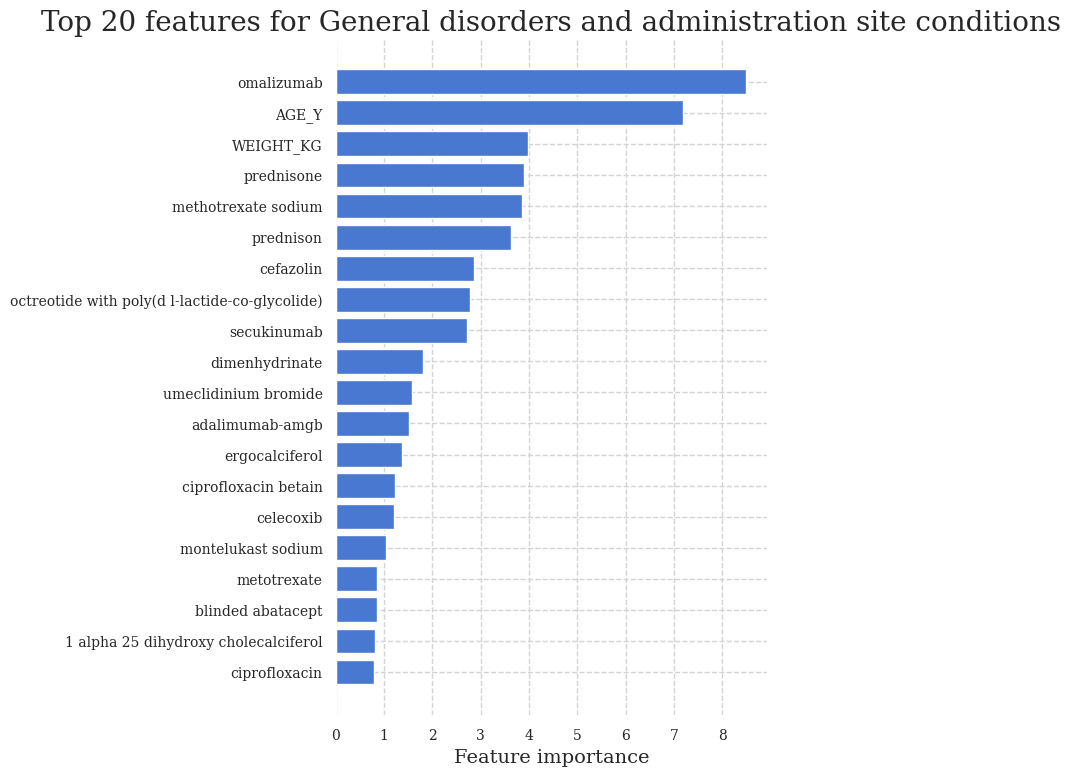

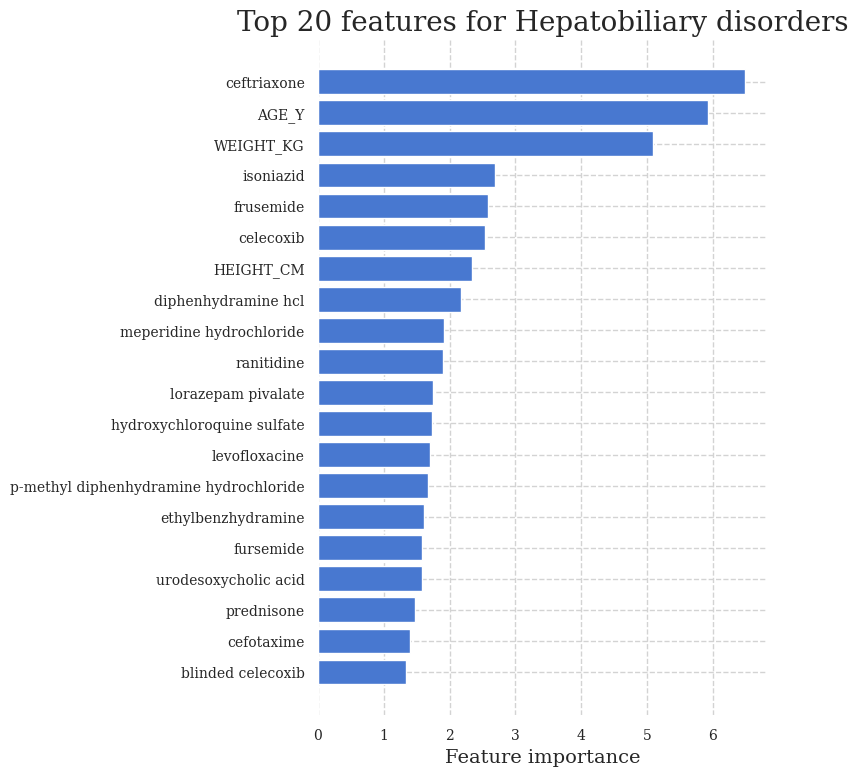

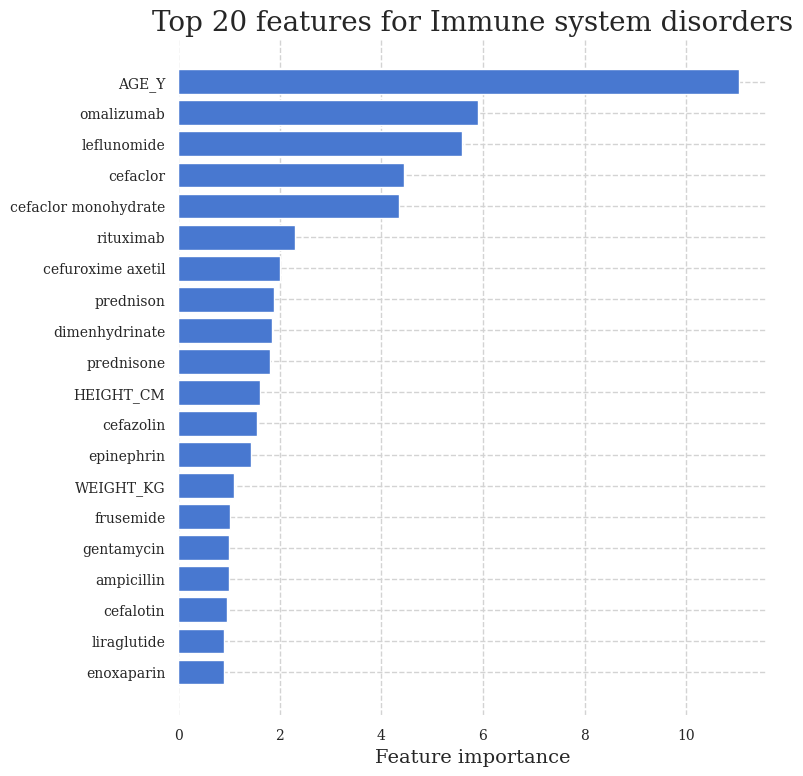

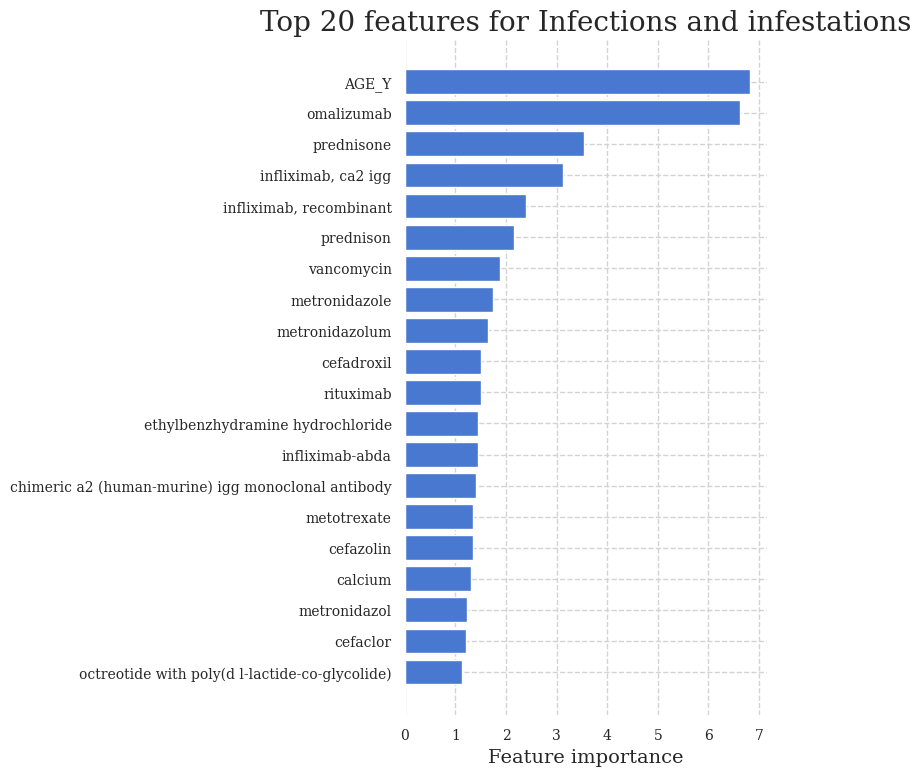

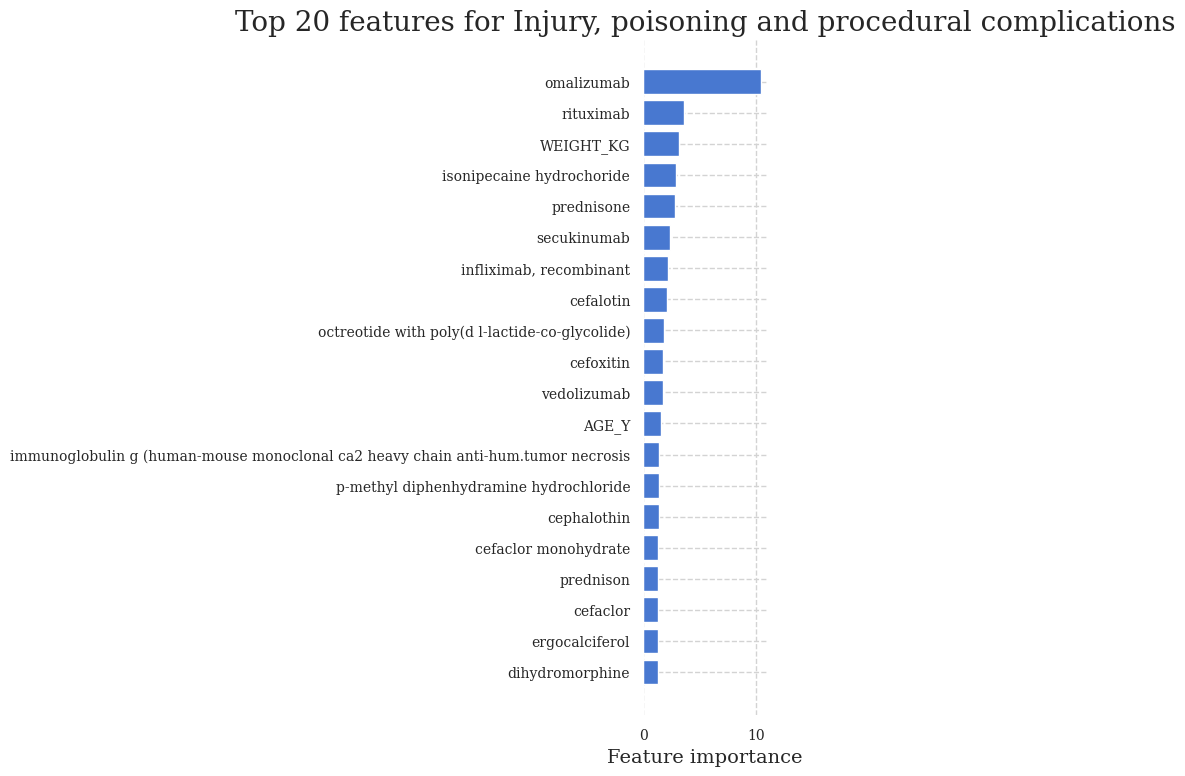

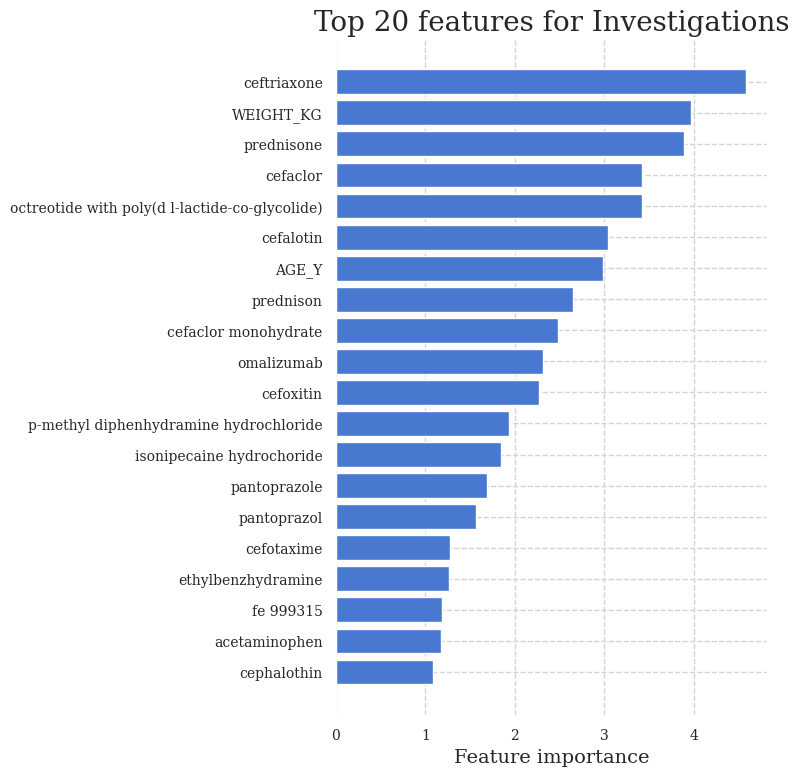

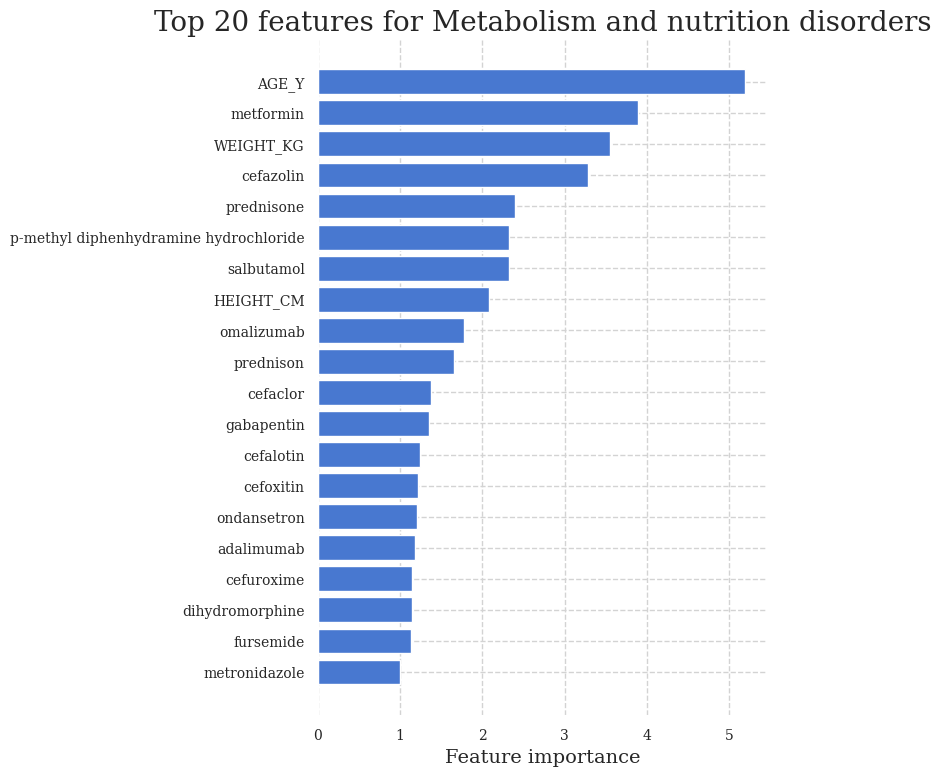

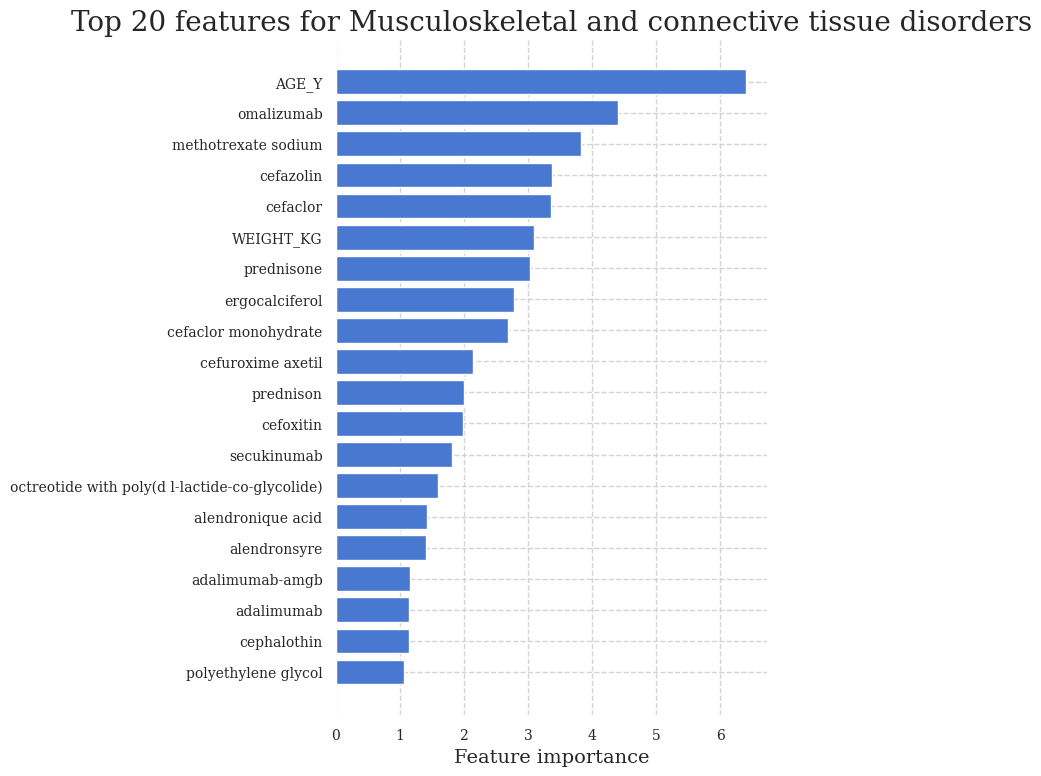

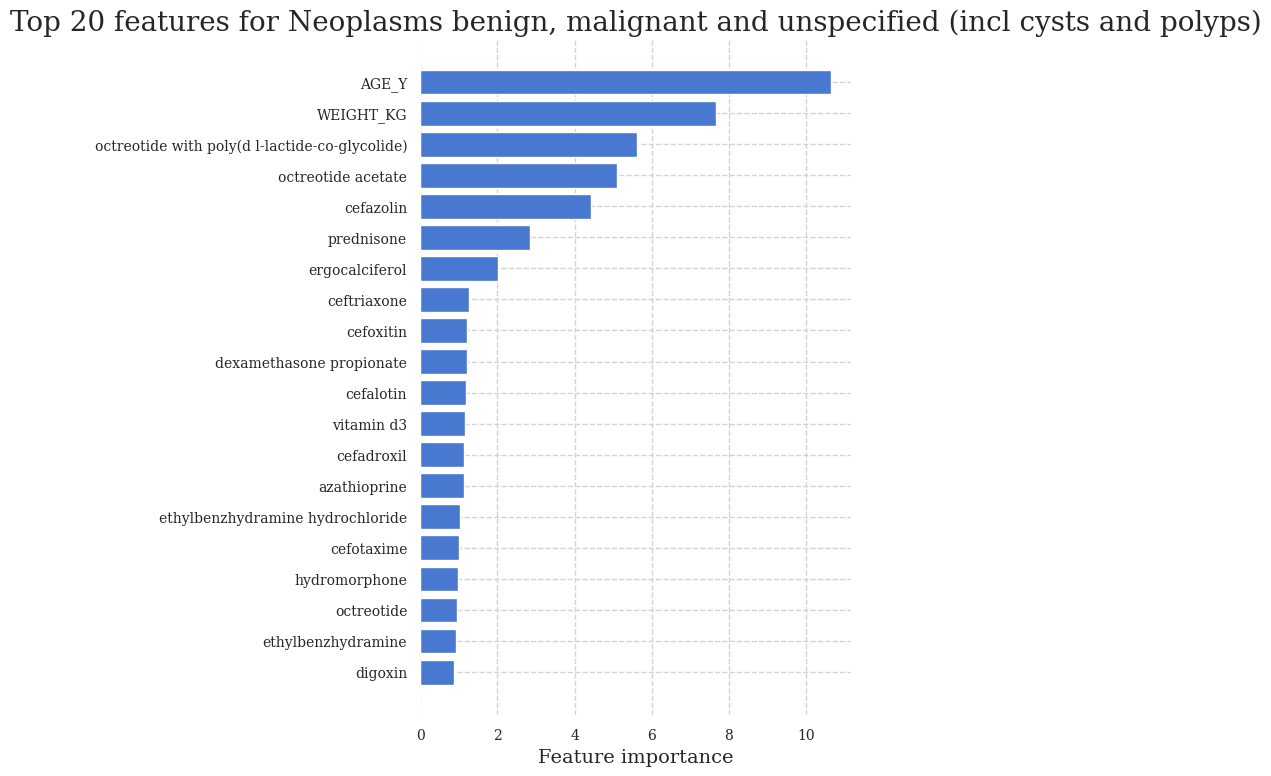

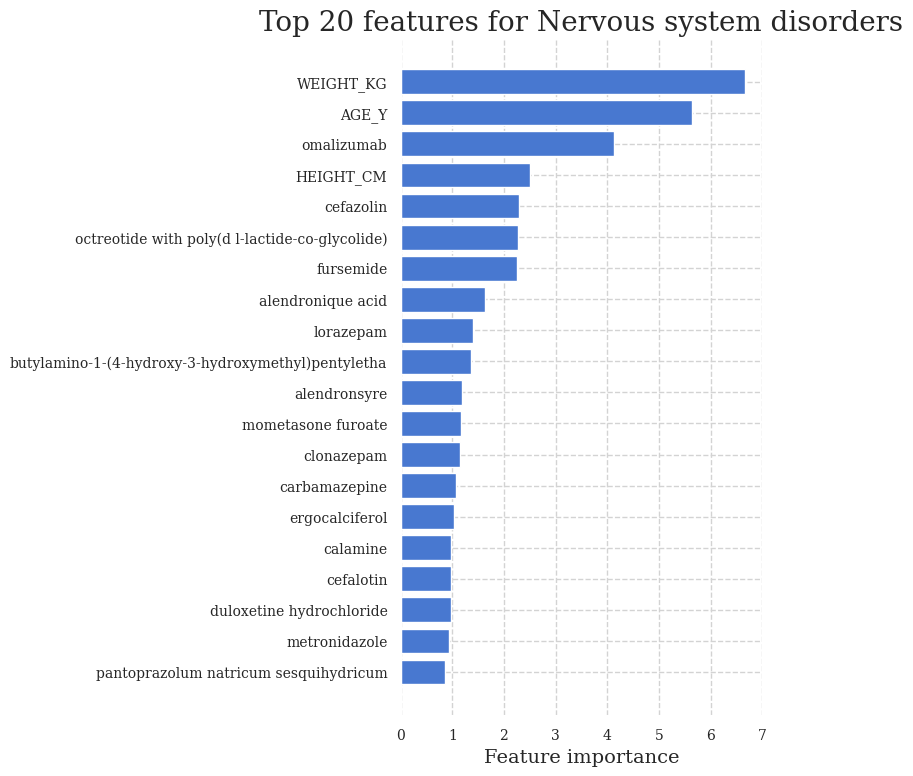

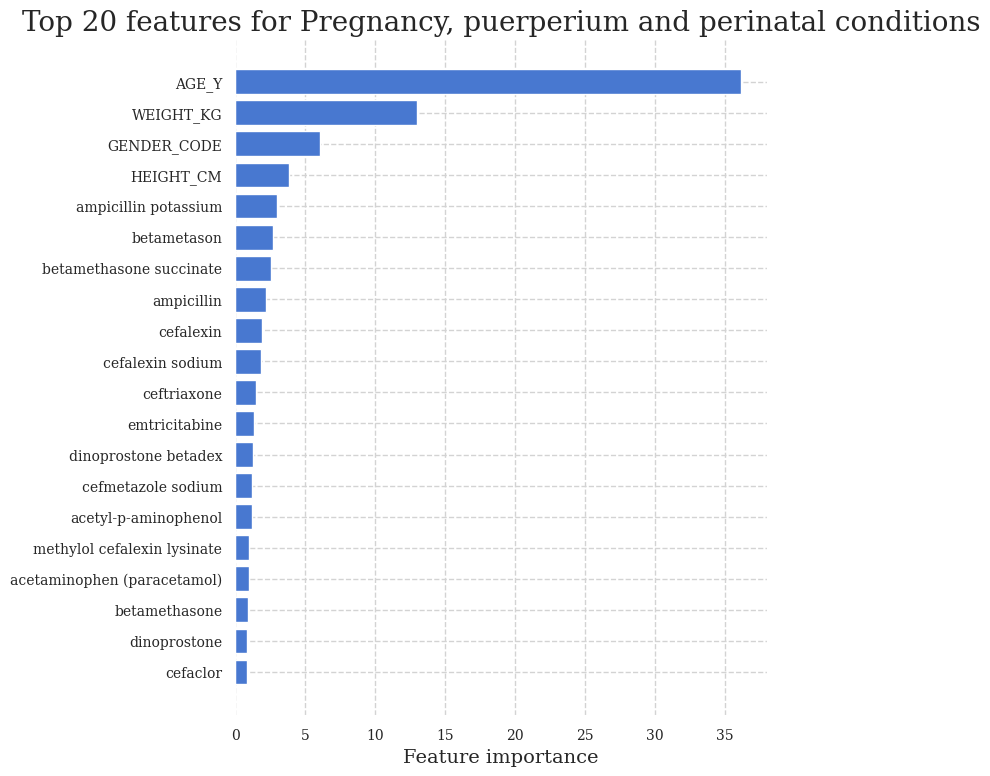

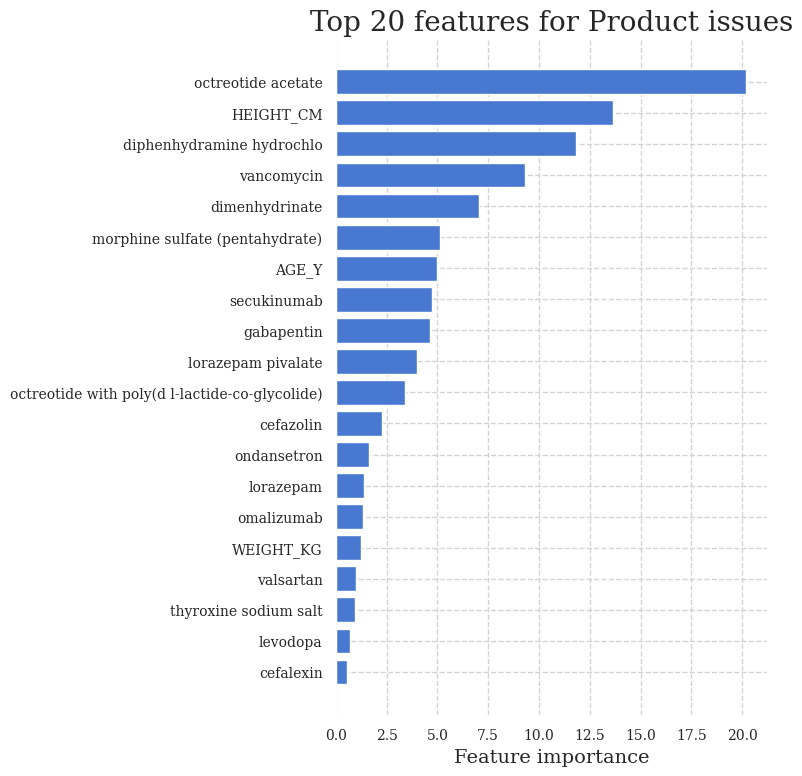

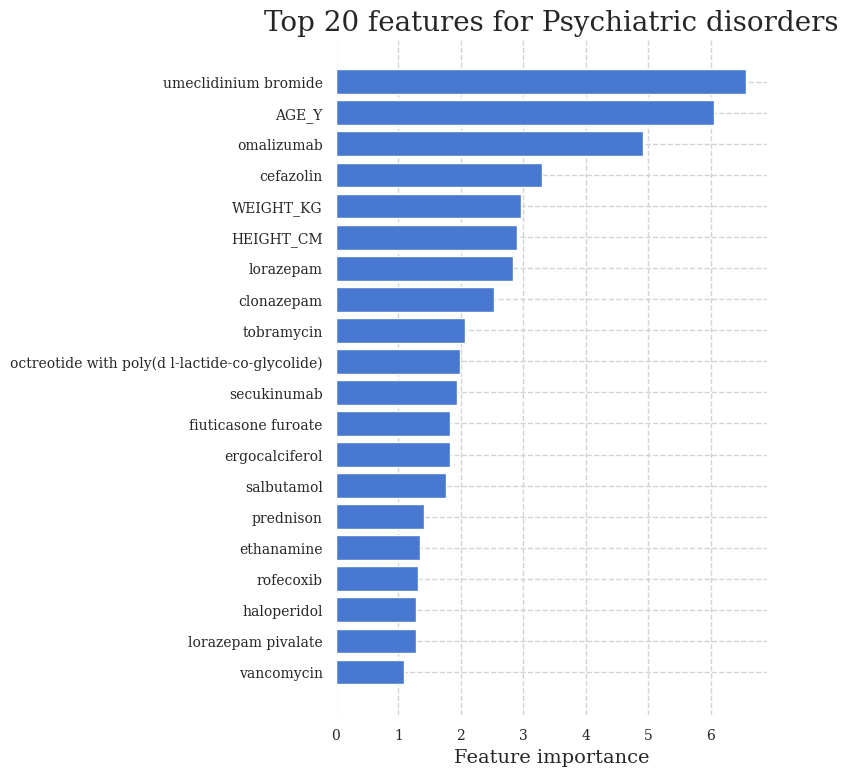

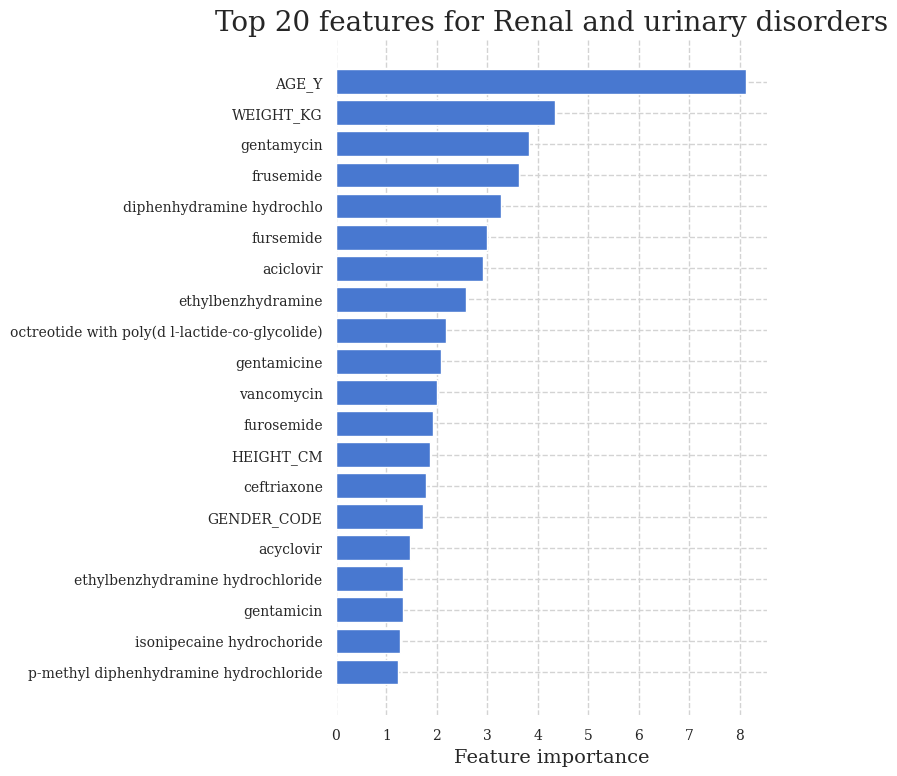

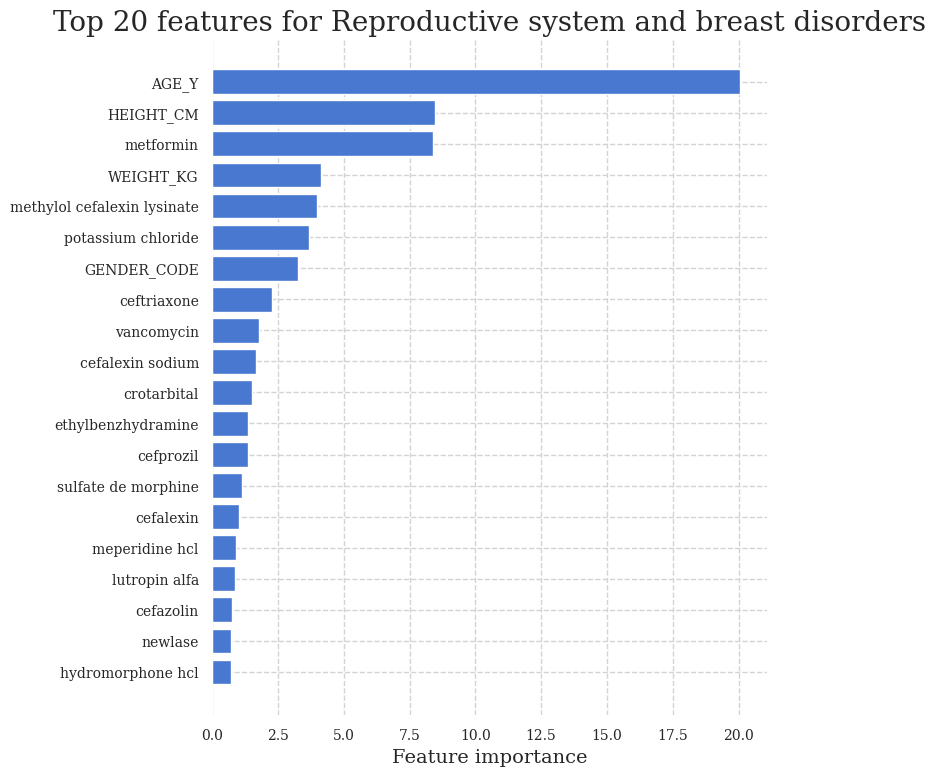

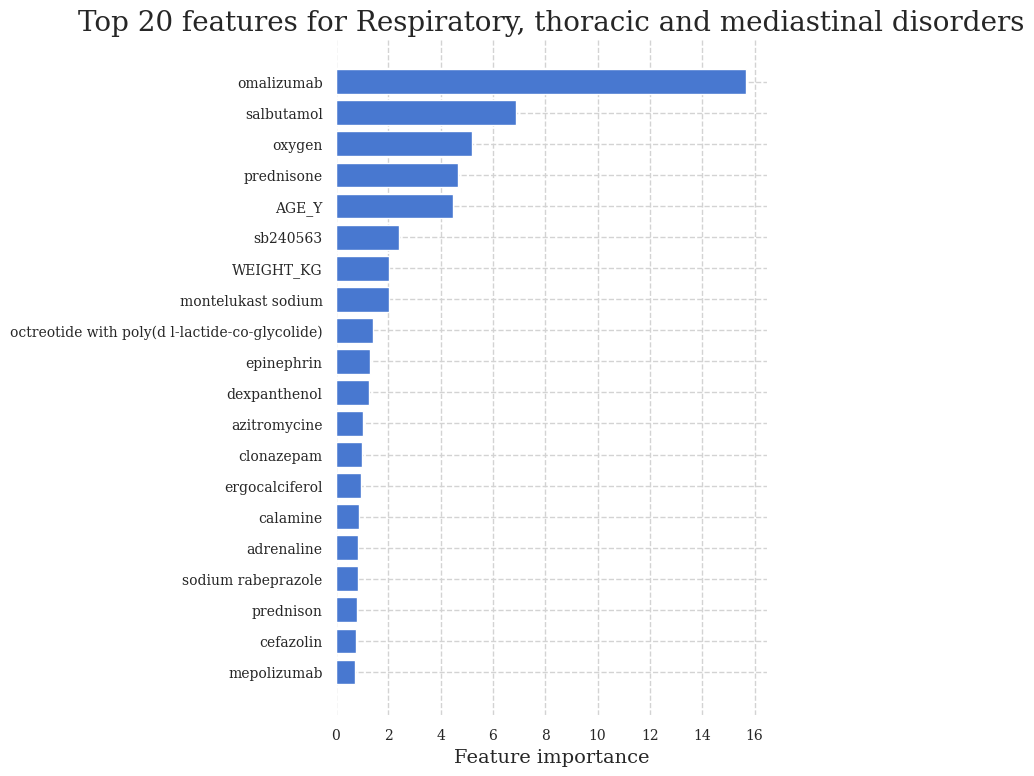

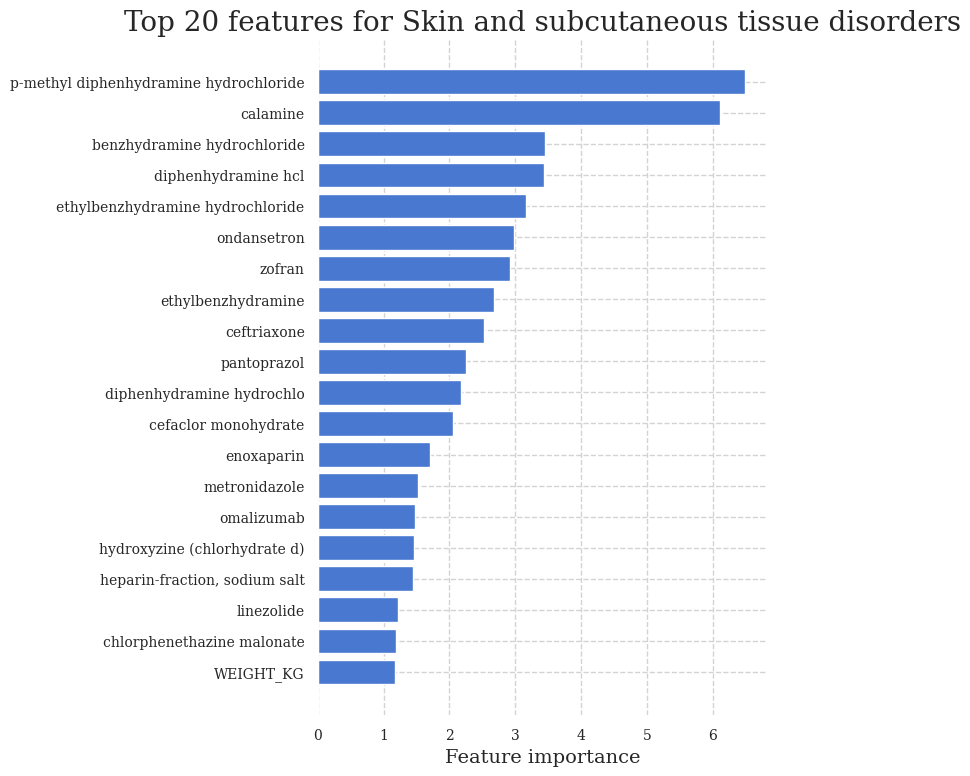

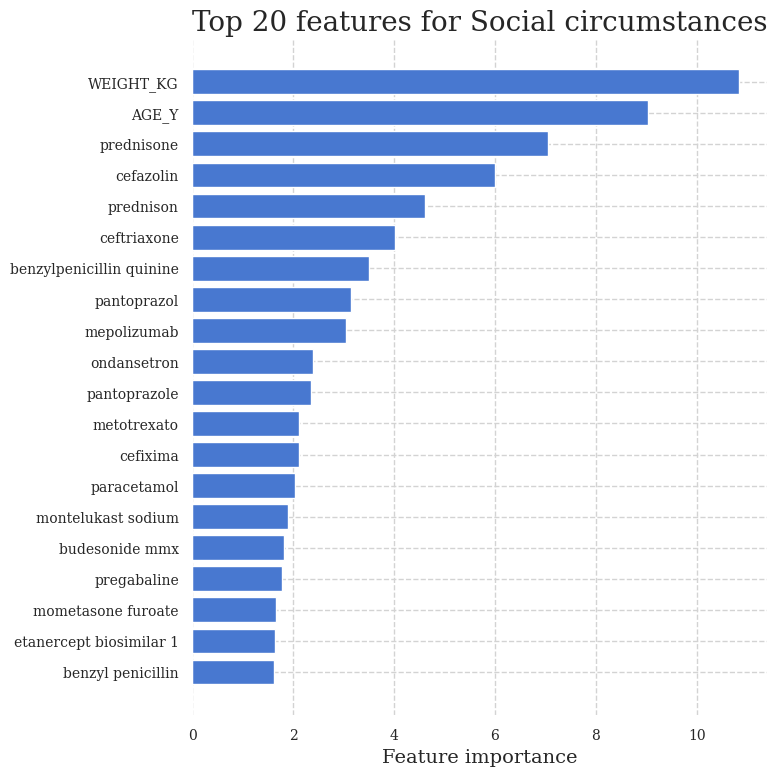

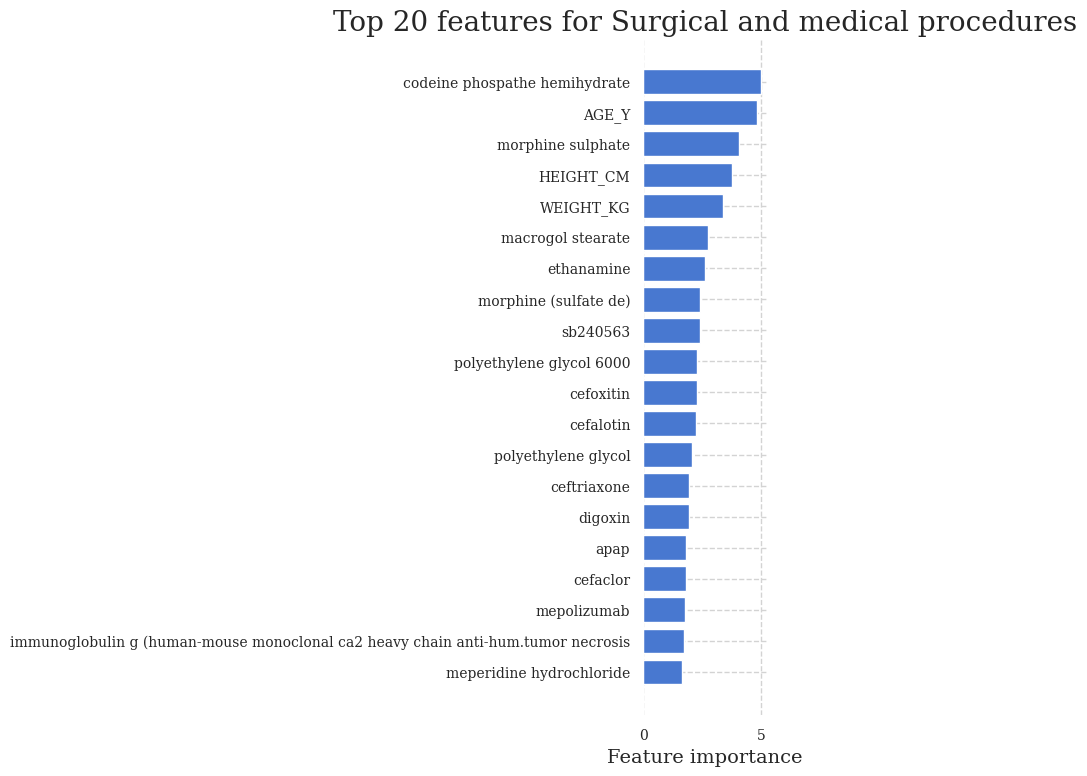

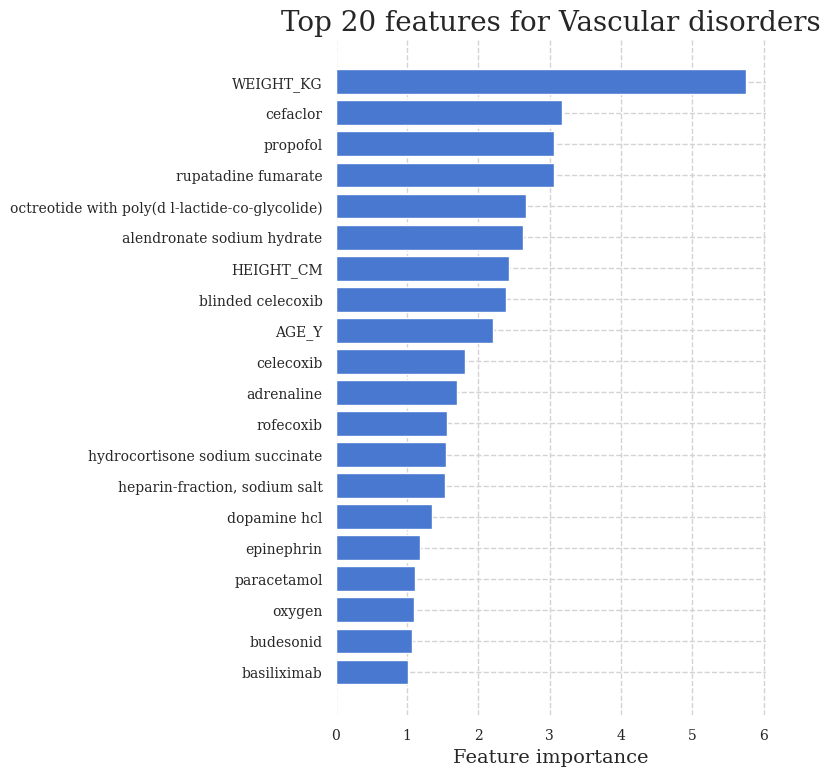

In [29]:
# feature_importances[k, j] = importance of feature j for SOC k
feature_importances = pd.DataFrame(
    0.0,
    index=soc_names,
    columns=feature_names
)

for soc in soc_names:
    model_k = models[soc]
    imp_k = model_k.get_feature_importance(type="FeatureImportance")
    feature_importances.loc[soc, :] = imp_k

for soc_example in soc_names:
    # Example: top 20 features for a single SOC
    # soc_example = "Gastrointestinal disorders"  # replace with the SOC you want
    top20 = feature_importances.loc[soc_example].sort_values(ascending=False).head(20)

    plt.figure(figsize=(8, 8))
    plt.barh(top20.index, top20.values)
    plt.xlabel("Feature importance")
    plt.title(f"Top 20 features for {soc_example}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()